## Распределение хи-квадрат.

Сгенерируем из него выборку объёма 1000 с параметром 5.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [14]:
rv = sts.chi2(5)
sample = rv.rvs(1000)

Построим график плотности распределения и гистограмму данной выборки:

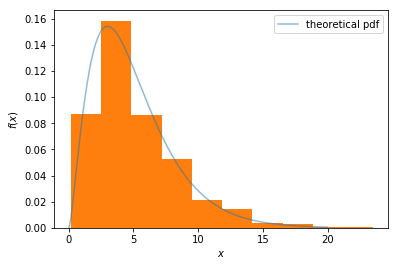

In [15]:
x = np.linspace(0,20,1000)
pdf = rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.hist(sample, normed = True)
plt.xlabel('$x$')

Теперь последовательно сгенерируем 1000 выборок объёма 5, 10, 50:

In [34]:
counts = [5, 10, 50]
array_rvs = []
for i in np.arange(len(counts)):
    array_rvs.append(np.empty((1000, counts[i])))
for i in np.arange(len(counts)):
    for j in np.arange(1000):
        array_rvs[i][j] = rv.rvs(counts[i])

Посчитаем их выборочные средние:

In [37]:
rvs_mean = np.empty((len(counts), 1000))
for i in np.arange(len(counts)):
    for j in np.arange(1000):
        rvs_mean[i][j] = np.mean(array_rvs[i][j])

Построим гистограммы распределений выборочных средних:

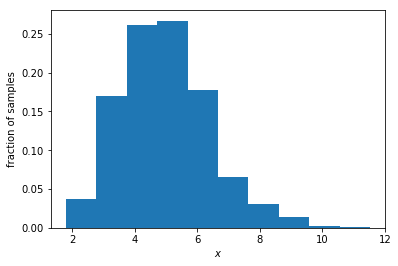

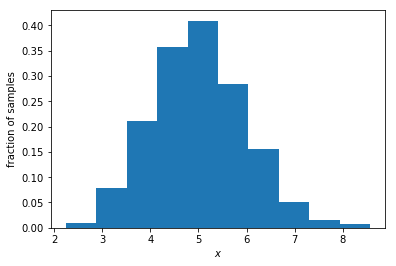

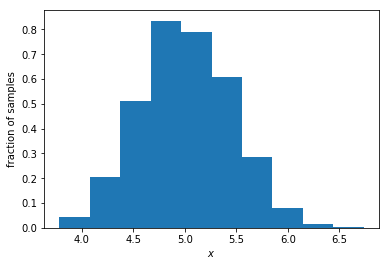

In [38]:
for i in np.arange(len(counts)):
    plt.hist(rvs_mean[i], normed = True)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')
    plt.show()

Согласно Википедии мат. ожидание хи-квадрат распределения с параметром k также равно k, а дисперсия равна 2k.
=> Для данного распределения мат.ожидание = 5, дисперсия = 10.

Посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних:

E = 5 для всех выборок. Дисперсия же принимает значения:

In [41]:
E = 5
D = []
for i in counts:
    D.append(10./i)
for i in D:
    print i

2.0
1.0
0.2


In [42]:
import math

array_norm = []
for d in D:
    norm_rv = sts.norm(E, math.sqrt(d))
    array_norm.append(norm_rv)

Теперь поверх каждой гистограммы нарисуем плотность соответствующего нормального распределения: 

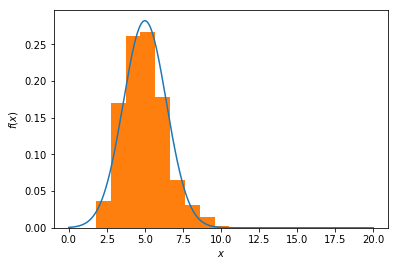

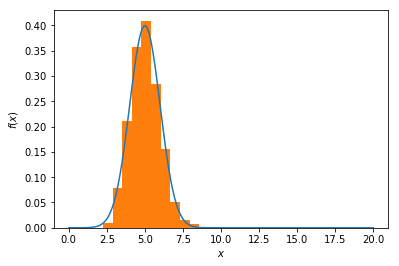

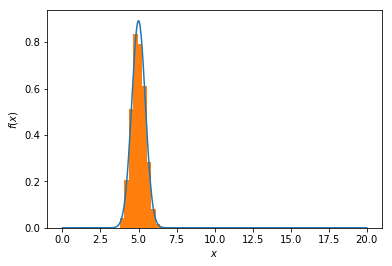

In [46]:
for i in np.arange(len(counts)):
    x = np.linspace(0,20,1000)
    pdf = array_norm[i].pdf(x)
    plt.plot(x, pdf)
    plt.hist(rvs_mean[i], normed = True)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

Как можно заметить по этим гистограммам, с ростом объема выборки точность аппроксимации распределения выборочных средних нормальным увеличивается.